In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot

In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train.dtype

dtype('uint8')

In [7]:
X_train=X_train/255
X_test=X_test/255


In [8]:
class_names=["Trzewik","Koszulka", "Spodnie", "Sweter", "Sukienka", "Płaszcz", "Sandał"," Koszula","Tenisówka","Torebka"]

In [9]:
class_names[y_train[8]]

'Płaszcz'

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(20,activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 20)                2020      
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 267,830
Trainable params: 267,830
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [14]:
# model.get_layer('dense_39') is hidden1

In [15]:
weights,biases=hidden1.get_weights()
weights

array([[ 0.05247784,  0.0557588 ,  0.0631998 , ...,  0.02823927,
         0.04961306,  0.02627957],
       [ 0.05285017,  0.01462983, -0.01217801, ...,  0.0343993 ,
         0.06787893,  0.00907291],
       [ 0.00909517,  0.0089016 , -0.02045201, ...,  0.00066359,
         0.00308727,  0.00693488],
       ...,
       [ 0.04485957, -0.04838768, -0.07260272, ..., -0.02107202,
         0.05827498, -0.03161446],
       [ 0.05090137, -0.07235077,  0.05532241, ..., -0.01232557,
         0.04973203,  0.03266243],
       [ 0.06425789, -0.04445722,  0.06098044, ..., -0.03834692,
         0.05401912, -0.05940072]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])

In [20]:
history=model.fit(X_train, y_train,epochs=30, validation_split=0.1,batch_size=32)

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7530 - accuracy: 0.7489 - val_loss: 0.5374 - val_accuracy: 0.8142
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4854 - accuracy: 0.8282 - val_loss: 0.4634 - val_accuracy: 0.8327
Epoch 3/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4344 - accuracy: 0.8481 - val_loss: 0.4276 - val_accuracy: 0.8440
Epoch 4/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4032 - accuracy: 0.8585 - val_loss: 0.3939 - val_accuracy: 0.8542
Epoch 5/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3803 - accuracy: 0.8666 - val_loss: 0.3787 - val_accuracy: 0.8628
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3620 - accuracy: 0.8706 - val_loss: 0.3672 - val_accuracy: 0.8662
Epoch 7/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3476 - accuracy: 0.8757 - val_loss: 0.5454 - val_accuracy:

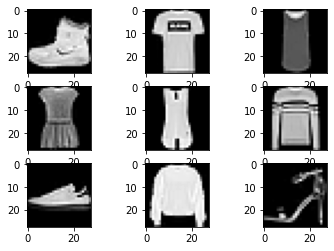

In [21]:
for i in range(9):

    pyplot.subplot(330+1+ i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [48]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4692 - accuracy: 0.8404


[0.46923592686653137, 0.840399980545044]

In [88]:
X_new=X_test[100:115]
y_predict=model.predict(X_new)
y_predict = np.round(y_predict).astype(int)

1/1 [==============================] - 0s 27ms/step


In [89]:
y_predict

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [90]:
y_predict.shape

(15, 10)

In [91]:
class_names=["Trzewik","Koszulka", "Spodnie", "Sweter", "Sukienka", "Płaszcz", "Sandał","Koszula","Tenisówka","Torebka"]

In [92]:
pred_classes=[]
for i in y_predict:
    for j in range(len(i)):
        if(i[j])==1:
            pred_classes.append(j)
            print(class_names[j])

Sweter
Sandał
Koszula
Sandał
Koszula
Tenisówka
Płaszcz
Koszula
Torebka
Sukienka
Spodnie
Płaszcz
Koszula
Sandał
Płaszcz
